In [1]:
from djexpcode.schemas import *
from natsort import natsorted
from wfield import *
from djexpcode import *
import djexpcode

import pylab as plt
%matplotlib notebook

mouse_id = 'JC048'
fitpars = (TwoPhotonReferenceParameters()*TwoPhotonVolume() & 
           'mouse_id = "{0}"'.format(mouse_id)).fetch(as_dict = True)
from wfield.allen import load_refregions
refregions = load_refregions()

pngsavepath = os.path.abspath(pjoin(os.path.dirname(os.path.dirname(djexpcode.__file__)),'figures/figure1/2p_examples'))
if not os.path.isdir(pngsavepath):
    os.mkdir(pngsavepath)
    print(pngsavepath)

pdfsavepath = os.path.abspath(pjoin(pngsavepath,'pdf'))
if not os.path.isdir(pdfsavepath):
    os.mkdir(pdfsavepath)
    print(pdfsavepath)

Connecting root@localhost:3306


In [2]:
# get data and rois in reference space
import pandas as pd
def get_roi_in_reference_space(key):
    
    rois = pd.DataFrame((Segmentation.ROI() & key).fetch())
    fitpars = (TwoPhotonReferenceParameters()*TwoPhotonVolume() & key).fetch(as_dict = True)
    if len(fitpars) > 1:
        raise(ValueError,'Wrong key {0}'.format(key))
    fitpars = fitpars[0]        
    dims = [fitpars['nlines'],fitpars['ncols']]
    refwin = (ReferenceWindow() & key).fetch()[0]

    # get the rois
    rois = [getROIcontour(c,dims) for c in rois.roi_pixels]
    # get the fit parameters
    cont = [points_to_extent(adjust_points_to_reference(c[0],dims = dims,**fitpars),
                           refwin['refim'].shape,refwin['extent']) for c in rois]
    centers = np.stack([c[1] for c in rois])
    centers = points_to_extent(adjust_points_to_reference(centers,dims = dims,**fitpars),
                      refwin['refim'].shape,refwin['extent'])
    return centers,cont

c = []
r = []
r2 = []
ses,sessub = (TwoPhotonVolume()*
              TwoPhotonReferenceParameters()& 'mouse_id = "{0}"'.format(mouse_id)).fetch('session_name','session_subname')
for sessions,session_subname in zip(ses,sessub):
    key = (TwoPhotonVolume() & 
           'session_name = "{0}"'.format(sessions) & 
          'session_subname = "{0}"'.format(session_subname)).proj().fetch()
    centers,conts = get_roi_in_reference_space(key[0])
    x,y,idx,vx,vy = (StimulusAirPuff.Triggered()*VisualStimuliStats.VisualStats() & 
                     key[0]).fetch('puff_amplitudes',
                                   'puff_amplitudes_pre',
                                   'is_puff_responsive',
                                   'stim_amplitudes',
                                   'stim_amplitudes_pre')
    
    x = np.vstack(x)
    y = np.vstack(y)
    x = np.nanmean(x,axis = 1)
    y = np.nanmean(y,axis = 1)
    idx = (x-y)>5
    r.append(x-y)
    c.append(centers)
    vx = np.stack(vx)
    vx = np.nanmean(vx,axis=2)
    vy = np.stack(vy)
    vy = np.nanmean(vy,axis=2)
    rv = vx-vy
    rv = np.nanmean(rv,axis = 1)
    r2.append(rv)

[(74,), (58,), (57,), (36,), (37,), (55,), (52,), (48,), (69,), (51,), (62,), (35,), (71,), (37,), (47,), (64,), (36,), (75,), (41,), (58,), (41,), (60,), (72,), (62,), (38,), (49,), (75,), (53,), (68,), (52,), (40,), (42,), (73,), (44,), (66,), (71,), (70,), (42,), (35,), (70,), (74,), (36,), (74,), (39,), (39,), (73,), (69,), (50,), (74,), (61,), (71,), (64,), (74,), (71,), (37,), (40,), (35,), (69,), (74,), (75,), (69,), (55,), (72,), (47,), (71,), (73,), (71,), (52,), (73,), (45,), (75,), (36,), (63,), (69,), (42,), (54,), (53,), (53,), (59,), (63,), (67,), (75,), (69,), (75,), (62,), (50,), (75,), (51,), (66,), (45,), (57,), (52,), (63,), (72,), (38,), (54,), (70,), (69,), (61,), (47,), (51,), (58,), (51,), (38,), (74,), (77,), (56,), (44,), (75,), (50,), (66,), (60,), (60,), (73,), (35,), (74,), (55,), (73,), (75,), (45,), (55,), (52,), (36,), (73,), (50,), (75,), (74,), (70,), (75,), (75,), (71,), (36,), (45,), (73,), (71,), (67,), (71,), (58,), (45,), (57,), (74,), (76,), (75,)

[(46,), (53,), (70,), (51,), (59,), (69,), (47,), (47,), (74,), (49,), (74,), (72,), (42,), (42,), (46,), (40,), (63,), (42,), (46,), (61,), (66,), (74,), (35,), (48,), (42,), (40,), (67,), (74,), (35,), (39,), (40,), (68,), (75,), (75,), (63,), (53,), (70,), (62,), (46,), (42,), (64,), (66,), (58,), (44,), (70,), (74,), (66,), (57,), (52,), (43,), (49,), (76,), (62,), (76,), (71,), (60,), (72,), (77,), (71,), (39,), (42,), (77,), (75,), (74,), (63,), (75,), (76,), (75,), (59,), (60,), (58,), (64,), (70,), (56,), (58,), (74,), (75,), (69,), (73,), (73,), (74,), (74,), (73,), (75,), (75,), (75,), (44,), (72,), (73,), (72,), (66,), (66,), (48,), (35,), (76,), (70,), (71,), (76,), (54,), (76,), (77,), (36,), (71,), (76,), (59,), (75,), (73,), (66,), (56,), (72,), (74,), (57,), (78,), (56,), (77,), (75,), (70,), (54,), (73,), (68,), (72,), (52,), (71,), (74,), (66,), (75,), (45,), (73,), (60,), (73,), (56,), (70,), (73,), (62,), (51,), (72,), (46,), (72,), (73,), (72,), (40,), (71,), (71,)

[(62,), (45,), (52,), (56,), (56,), (69,), (69,), (68,), (54,), (43,), (67,), (75,), (71,), (39,), (63,), (72,), (57,), (73,), (73,), (72,), (67,), (38,), (58,), (40,), (64,), (58,), (57,), (36,), (47,), (51,), (39,), (47,), (56,), (43,), (57,), (50,), (70,), (61,), (73,), (67,), (67,), (67,), (52,), (59,), (72,), (66,), (64,), (37,), (74,), (46,), (61,), (51,), (68,), (36,), (74,), (68,), (70,), (69,), (38,), (58,), (55,), (75,), (75,), (47,), (76,), (50,), (67,), (68,), (37,), (71,), (63,), (75,), (37,), (61,), (66,), (76,), (73,), (58,), (48,), (73,), (70,), (65,), (76,), (54,), (38,), (75,), (66,), (59,), (44,), (68,), (69,), (75,), (72,), (46,), (51,), (75,), (76,), (68,), (68,), (44,), (72,), (52,), (65,), (43,), (74,), (45,), (64,), (53,), (68,), (68,), (52,), (77,), (66,), (50,), (64,), (49,), (74,), (72,), (66,), (50,), (71,), (54,), (39,), (70,), (69,), (73,), (51,), (49,), (68,), (66,), (72,), (58,), (63,), (75,), (76,), (64,), (65,), (67,), (73,), (70,), (64,), (77,), (72,)

[(70,), (48,), (48,), (68,), (49,), (50,), (37,), (68,), (55,), (53,), (57,), (73,), (59,), (38,), (41,), (40,), (57,), (53,), (62,), (46,), (65,), (58,), (65,), (56,), (40,), (35,), (48,), (35,), (51,), (61,), (45,), (73,), (57,), (48,), (42,), (37,), (58,), (35,), (62,), (56,), (64,), (44,), (59,), (57,), (76,), (59,), (73,), (63,), (51,), (36,), (43,), (51,), (56,), (45,), (45,), (47,), (38,), (54,), (37,), (54,), (69,), (40,), (71,), (41,), (56,), (60,), (37,), (74,), (46,), (50,), (35,), (42,), (47,), (60,), (51,), (47,), (43,), (40,), (59,), (39,), (69,), (69,), (74,), (44,), (71,), (60,), (40,), (61,), (50,), (45,), (57,), (59,), (52,), (39,), (46,), (65,), (61,), (45,), (61,), (35,), (42,), (47,), (50,), (49,), (64,), (67,), (45,), (56,), (67,), (64,), (59,), (43,), (42,), (64,), (55,), (47,), (43,), (51,), (70,), (63,), (56,), (61,), (38,), (36,), (69,), (50,), (52,), (48,), (70,), (58,), (47,), (65,), (36,), (50,), (66,), (54,), (47,), (46,), (42,), (40,), (60,), (66,), (51,)

[(92,), (59,), (54,), (62,), (90,), (90,), (79,), (64,), (54,), (73,), (51,), (71,), (58,), (70,), (65,), (57,), (71,), (73,), (55,), (55,), (72,), (60,), (75,), (65,), (55,), (63,), (51,), (71,), (59,), (74,), (89,), (81,), (61,), (54,), (50,), (72,), (57,), (84,), (67,), (87,), (51,), (71,), (50,), (54,), (73,), (68,), (72,), (59,), (85,), (86,), (63,), (57,), (89,), (67,), (54,), (80,), (59,), (57,), (54,), (63,), (50,), (61,), (55,), (54,), (56,), (81,), (85,), (77,), (64,), (87,), (52,), (61,), (65,), (65,), (58,), (69,), (54,), (52,), (70,), (60,), (66,), (52,), (50,), (69,), (69,), (69,), (57,), (59,), (85,), (52,), (78,), (65,), (65,), (59,), (52,), (51,), (50,), (53,), (54,), (51,), (79,), (55,), (52,), (54,), (81,), (50,), (62,), (64,), (68,), (58,), (55,), (70,), (62,), (62,), (54,), (63,), (65,), (79,), (63,), (50,), (50,), (57,), (63,), (83,), (73,), (54,), (61,), (63,), (81,), (56,), (63,), (76,), (64,), (52,), (68,), (67,), (51,), (63,), (87,), (72,), (75,), (60,), (70,)

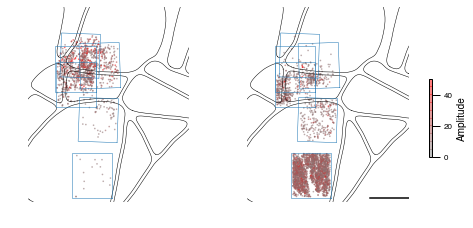

In [16]:
refwin = (ReferenceWindow()& key).fetch()[0]
from matplotlib.colors import LinearSegmentedColormap,ListedColormap
refwin = (ReferenceWindow()& fitpars[0]).fetch()[0]
refallen = (AllenReferenceParameters() & refwin).fetch(as_dict = True)[0]

black2red=LinearSegmentedColormap.from_list('black2red', ['gray', 'red'],N = 10)
black2red_cmap = black2red(np.arange(black2red.N))
black2red_cmap[:,-1] = np.linspace(0.3, 1, black2red.N)
black2red_cmap[40:,-1] = 1
black2red = ListedColormap(black2red_cmap)
m = r.copy()

w = 3.6
%matplotlib inline

fig = plt.figure(figsize = [w*2,w])

fig.add_subplot(1,2,1)
for i,centers in enumerate(c):
    idx = r[i]>5
#     idx = np.argsort(r2[i])
    plt.scatter(-1*centers[idx,0],centers[idx,1],
                s = 2,c = np.clip(r[i][idx],5,50),
                vmax = 50,vmin = 0,
                marker = '.',
                alpha = 0.5,cmap = black2red)
#     print(len(centers))

ww = []
for p in fitpars:
    w = np.array([[0,0],
                  [p['ncols']-100,0],
                  [p['ncols']-100,p['nlines']],
                  [0,p['nlines']],[0,0]])
    ww.append(points_to_extent(adjust_points_to_reference(w,dims = [p['nlines'],
                                                                   p['ncols']],**p),
                               refwin['refim'].shape,refwin['extent']))

res = adjust_allen_areas(refregions,**refallen)
plot_allen_areas(res,color=[0,0,0],lw = 0.5,plotnames=False);
plt.axis('equal')
extent = refwin['extent']
plt.axis('square')
plt.axis(extent)
plt.axis([-1.9,1.9,2.3,-2.3])

for p in ww:
    plt.plot(-p[:,0],p[:,1],color = colors[2],lw = 0.5)
plt.axis('off')
fig.add_subplot(1,2,2)
for i,centers in enumerate(c):
    idx = np.argsort(r2[i])
    idx = r2[i]>5
    ii = plt.scatter(-1*centers[idx,0],centers[idx,1],
                s = 2,c = np.clip(r2[i][idx],5,50),
                vmax = 50,vmin = 0,
                marker = '.',
                alpha = 0.5,cmap = black2red)
#     print(len(centers))


res = adjust_allen_areas(refregions,**refallen)
plot_allen_areas(res,color=[0,0,0],lw = 0.5,plotnames=False);
plt.axis('equal')
for p in ww:
    plt.plot(-p[:,0],p[:,1],color = colors[2],lw = 0.5)
plt.axis('square')
plt.axis(extent)
plt.axis('off')
plt.plot([1,2],[2.2,2.2],'k')
plt.axis([-1.9,1.9,2.3,-2.3])

cax = fig.add_axes([.92,.3,.005,.3])
plt.colorbar(ii,shrink = 0.3,cax = cax, label = 'Amplitude')

fnames = []
fnames.append(pjoin(pngsavepath,'fig1_allen_matched_fov_JC048.png'))
fig.savefig(fnames[-1]);
fnames.append(pjoin(pdfsavepath,'fig1_allen_matched_fov_JC048.pdf'))
fig.savefig(fnames[-1]);


In [9]:
r2[0].shape

(2480,)

In [4]:
print('There are {0}/{1} plotted cells this figure from {2} sessions.'.format(
    np.sum([len(a[a>5]) for a in r]),
    np.sum([len(a) for a in r]),len(sessub)))


There are 1249/11858 plotted cells this figure from 6 sessions.
